LUIZ DA SILVA MOURA 
11611EMT028

Imports necessarios


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import concurrent.futures
import planta
import math

In [6]:
def mult_aval(people):
    people_aval = np.array([])
    with concurrent.futures.ProcessPoolExecutor() as executor:
        for inp, response in zip(people, executor.map(planta.aval_model, people)):
            if (math.isnan(response)):
                inp[3] = 0
                print('ahhhhh nan')
            else:
                inp[3] = response
            if(len(people_aval) > 0):
                people_aval = np.append(people_aval,[inp], axis=0)
            else:
                people_aval = np.array([inp])
    return people_aval


função de avaliação

In [7]:
def mult_aval(people):
    people_aval = np.array([])
    with concurrent.futures.ProcessPoolExecutor() as executor:
        for inp, response in zip(people, executor.map(planta.aval_model, people)):
            inp[3] = response
            if(len(people_aval) > 0):
                people_aval = np.append(people_aval,[inp], axis=0)
            else:
                people_aval = np.array([inp])
    return people_aval


metodo de seleção

In [8]:
def random_ranking(pesos):
    sumpos = pesos[0]/sum(pesos)
    ran = random.uniform(0,1)
    lucky = 0
    while(sumpos<ran):
        lucky = lucky+1
        sumpos  = sumpos  +  (lucky/sum(pesos))
    return(lucky)
positions = np.linspace(1,10,10)
#print(random_ranking(positions))

cruzmento


In [9]:
def crossover(father, mother):
    ran = random.randint(0, 2)
    son1 = np.zeros(4)
    son2 = np.zeros(4)
    for i in range(len(father)-1):
        son1[i] = father[i]
        son2[i] = mother[i]
    son1[ran] = mother[ran]
    son2[ran] = father[ran]
    return [son1,son2] 

Mutation

In [10]:
def Mutation(father, rang):
    ran = random.randint(0, 2)
    son = np.zeros(4)
    for i in range(len(father)-1):
        if(i==ran):
            son[i]  = random.uniform(father[i]- (father[i]*rang), father[i]+ (father[i]*rang))
        else:
            son[i] = father[i]
    #print('mu {} filho {}'.format(father, son))
    return son

In [11]:
#adiciona somente se nao tem repetido
def Addson(sons,son, index):
    #print('in{}//->//'.format(index))
    if(len(np.where((sons[:]==son).all(1))[0]) == 0 ):
        for i in range(4):
            sons[index][i] = son[i]
        return True
    return False

TRAIN'S PARAM

In [12]:
Kp_i = 3.0
Ki_i = 0.1071
Kd_i = 21

n_parti = 25
people = np.zeros([n_parti,4]) #Kp Ki Kd , fa
v_people =  np.zeros([n_parti,3])#velocidade do enxame
c1 = 0.7
c2 = 1.43
w = 0.8
rang = 95/100# ex 95%
n_gera = 100
FatAg = 0.000095



Init population

In [13]:
for i in range(n_parti):
    repeat = True
    new_people = np.zeros(4)
    while (repeat):
        new_people[0] = random.uniform(Kp_i- (Kp_i*rang), Kp_i+ (Kp_i*rang))
        new_people[1] = random.uniform(Ki_i- (Ki_i*rang), Ki_i+ (Ki_i*rang))
        new_people[2] = random.uniform(Kd_i- (Kd_i*rang), Kd_i+ (Kd_i*rang))
        if(len(np.where((people[:]==new_people).all(1))[0]) == 0 ):
            people[i][0] = new_people[0]
            people[i][1] = new_people[1]
            people[i][2] = new_people[2]
            v_people[0] = random.uniform(0, 1)
            v_people[1] = random.uniform(0, 1)
            v_people[2] = random.uniform(0, 1)
            repeat = False
print(people)

[[7.55952174e-01 1.85523123e-01 3.05873212e+01 0.00000000e+00]
 [2.12966591e-01 1.06796076e-01 1.53157981e+01 0.00000000e+00]
 [2.17956921e+00 1.70383061e-01 5.13525666e+00 0.00000000e+00]
 [5.22933249e+00 6.60312099e-02 2.92235646e+01 0.00000000e+00]
 [3.09991441e+00 1.37704680e-01 3.11757917e+01 0.00000000e+00]
 [2.95463143e+00 4.27499519e-02 3.51217477e+01 0.00000000e+00]
 [6.67577984e-01 8.30855479e-02 2.99493970e+01 0.00000000e+00]
 [2.02442690e+00 1.01210144e-02 1.80094595e+00 0.00000000e+00]
 [3.49206892e+00 1.76696418e-01 4.32851912e+00 0.00000000e+00]
 [2.76224874e-01 1.43034185e-01 1.98560092e+01 0.00000000e+00]
 [1.85094360e+00 1.72363706e-01 4.00712507e+00 0.00000000e+00]
 [4.32724545e+00 5.19618829e-02 2.95136237e+01 0.00000000e+00]
 [2.40587712e-01 1.96488238e-01 8.29310351e+00 0.00000000e+00]
 [2.28969087e+00 7.66509626e-02 3.31842627e+01 0.00000000e+00]
 [5.27520452e+00 5.78487804e-02 2.06085415e+00 0.00000000e+00]
 [5.38647579e+00 1.40955198e-01 1.49358905e+01 0.000000

TRAIN

In [14]:
betters = [[Kp_i,Ki_i,Kd_i,planta.aval_model([Kp_i,Ki_i,Kd_i])]]
better_global = betters
ger =0
while(ger<= n_gera):
    #avalia enxame
    print('geração {} =>{}'.format(ger,better_global))
    p = mult_aval(people)# calculo do fa
    population = p[p[:,3].argsort()]
    print(population)
    #acina o melhor local em uma lista
    betters = np.append(betters,[population[n_parti-1]], axis=0)
    #pega o melhor global 
    better_global = p[p[:,3].argsort()][n_parti-1]
    if(n_gera == ger):
        break
    if(better_global[3] > FatAg ):
        break
    r1 = random.uniform(0,1)
    r2 = random.uniform(0,1)
    for p in range(n_parti):
        for i in range(len(population[0][:])-1):
            v_people[p][i] = (w*v_people[p][i]) +(c1*r1*(betters[ger][i]-population[p][i])) + (c1*r1*(better_global[i]-population[p][i]))
            population[p][ i] = population[p][i] + v_people[p][i]
    people = population
    ger = ger + 1

geração 0 =>[[3.0, 0.1071, 21, 2.503139964881296e-07]]
[[2.40587712e-01 1.96488238e-01 8.29310351e+00 1.21829481e-07]
 [2.12966591e-01 1.06796076e-01 1.53157981e+01 1.26166242e-07]
 [2.76224874e-01 1.43034185e-01 1.98560092e+01 1.27564019e-07]
 [7.55952174e-01 1.85523123e-01 3.05873212e+01 1.46519687e-07]
 [6.67577984e-01 8.30855479e-02 2.99493970e+01 1.49407495e-07]
 [1.02709036e+00 1.22341593e-01 3.67262078e+01 1.55694099e-07]
 [8.36608485e-01 8.54055492e-02 2.38463273e+01 1.58825017e-07]
 [1.98078152e+00 1.94708590e-01 4.00447309e+01 1.73312915e-07]
 [2.18498104e+00 6.97114598e-02 3.43715012e+01 1.97946329e-07]
 [2.28969087e+00 7.66509626e-02 3.31842627e+01 2.01744366e-07]
 [1.85094360e+00 1.72363706e-01 4.00712507e+00 2.16121190e-07]
 [4.01410905e+00 1.87375274e-01 3.98373693e+01 2.16216947e-07]
 [3.09991441e+00 1.37704680e-01 3.11757917e+01 2.21510418e-07]
 [2.95463143e+00 4.27499519e-02 3.51217477e+01 2.29869529e-07]
 [3.66068077e+00 5.41953068e-02 3.81606892e+01 2.32485882e-07]


In [81]:
print(people)

[[-3.85714574e+03 -5.46752516e+02 -7.20128910e+04  1.17562813e-04]
 [-3.63903178e+03 -5.15606959e+02 -6.76160757e+04  1.04134121e-04]
 [-3.44843128e+03 -4.89559340e+02 -6.43401642e+04  9.38936045e-05]
 [-3.34766154e+03 -4.76111064e+02 -6.23171046e+04  8.82800835e-05]
 [-3.31575701e+03 -4.70753701e+02 -6.16346435e+04  8.64801121e-05]
 [-3.28700792e+03 -4.66462152e+02 -6.12905196e+04  8.52515036e-05]
 [-3.29155971e+03 -4.66073094e+02 -6.11766779e+04  8.52106982e-05]
 [-3.29043856e+03 -4.68989089e+02 -6.06836463e+04  8.44927887e-05]
 [-3.25730132e+03 -4.60559845e+02 -6.06008126e+04  8.35294850e-05]
 [-3.27593871e+03 -4.64322605e+02 -6.10496045e+04  8.46301494e-05]
 [-3.22537559e+03 -4.58775137e+02 -6.01605009e+04  8.21087963e-05]
 [-3.26753588e+03 -4.64198798e+02 -6.10481952e+04  8.44111497e-05]
 [-3.18071739e+03 -4.52741514e+02 -5.99989769e+04  8.07554877e-05]
 [-3.17096009e+03 -4.48926897e+02 -5.92465130e+04  7.94965662e-05]
 [-3.17269330e+03 -4.51601616e+02 -5.91523689e+04  7.94126366e

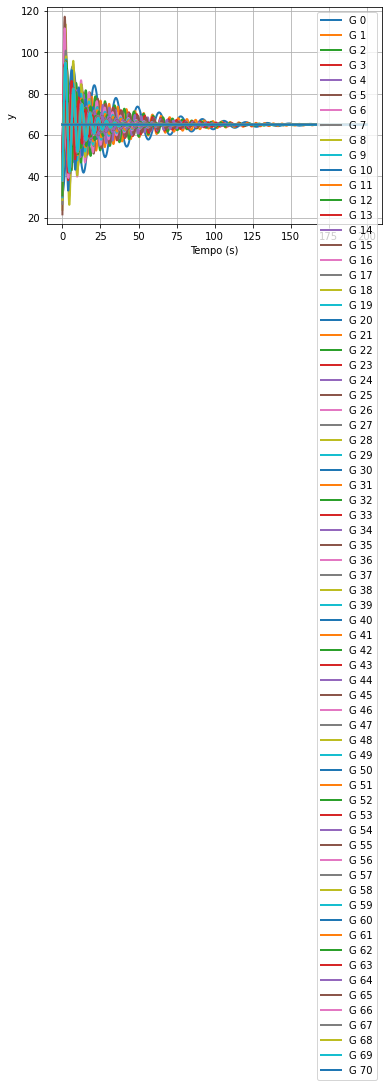

In [82]:
planta.plot(betters)


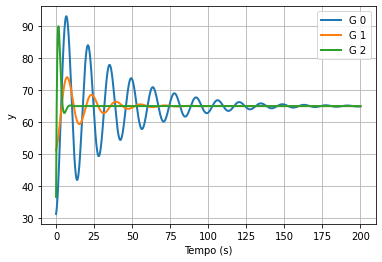

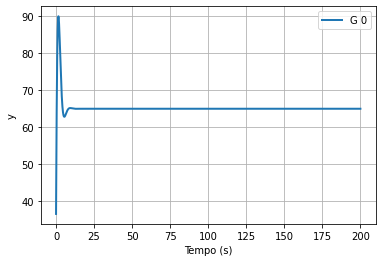

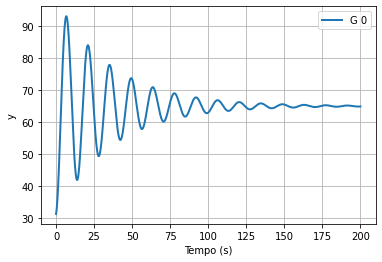

[[ 3.00000000e+00  1.07100000e-01  2.10000000e+01  2.50313996e-07]
 [ 4.48260270e+00  1.19369200e-01  5.26236876e+00  4.00175006e-07]
 [ 5.80237966e+00  2.82115705e-01 -4.86889170e+00  4.53048144e-07]
 [ 7.03594957e+00  4.49891734e-01 -9.38590202e+00  5.33202195e-07]
 [ 8.78767891e+00  2.55323919e-01 -3.48675549e+00  7.50005663e-07]
 [ 1.44738268e+01  2.50959706e-01  6.31888177e+00  1.14824606e-06]
 [ 1.08582632e+01  2.06333343e-01 -1.66541223e+00  1.07709838e-06]
 [ 1.88214489e+01  3.97782548e-01  1.70128731e+00  1.72988367e-06]
 [ 2.35427616e+01  6.96471775e-01 -1.38177698e+00  2.26978650e-06]
 [ 2.50879548e+01  8.69696771e-01 -4.03540531e-01  2.21414747e-06]
 [ 3.56501321e+01  6.59951071e-01  7.41711461e+00  2.82062532e-06]
 [ 2.98253740e+01  7.61298473e-01 -1.72243556e+00  4.04619163e-06]
 [ 4.00618682e+01  8.84773465e-01 -3.33273733e-01  5.05344728e-06]
 [ 4.52663639e+01  1.15792685e+00 -1.40808924e-01  5.56255793e-06]
 [ 4.16163317e+01  2.83468170e-01  8.80905296e-01  7.52436337e

In [77]:
planta.plot([betters[0],betters[10],betters[len(betters)-1]])
planta.plot([better_global])
planta.plot([betters[0]])
print(betters)

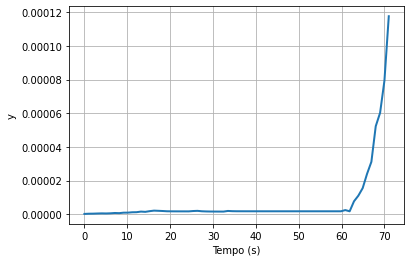

In [83]:
plt.figure()
plt.plot(np.linspace(0,len(betters),len(betters)), betters.T[3], lw=2)
plt.xlabel('Tempo (s)')
plt.ylabel('y')
plt.grid()
plt.show()

In [11]:
p = np.array([[1,1,2,3],[1,1,2,3]])
print(len(p[0][:]))
v = np.zeros((n_parti,3))
x = np.zeros((n_parti,3))
for v_cal, x_cal in zip(v,x):
    v_cal = [1,1,-1]
    x_cal = [1,1,-1]
    print(x_cal)
print(x)

4
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
